In [1]:
import pandas as pd

In [2]:
credit_data_csv = "Resources/credits.csv"
title_data_csv = "Resources/titles.csv"

# load data into a pandas dataframe
credit_data = pd.read_csv(credit_data_csv)
title_data = pd.read_csv(title_data_csv)

# merge the two datasets into a single dataframe 
netflix_complete = pd.merge(title_data, credit_data, how="left", on=["id"])
netflix_complete.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748.0,Robert De Niro,Travis Bickle,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658.0,Jodie Foster,Iris Steensma,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,7064.0,Albert Brooks,Tom,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3739.0,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR


In [3]:
netflix_complete_movies = netflix_complete.drop(netflix_complete[netflix_complete["type"]=='SHOW'].index)
movie_list = netflix_complete_movies["title"].unique()
moviesDF = netflix_complete_movies.drop_duplicates(subset = ['title'])
moviesDF

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748.0,Robert De Niro,Travis Bickle,ACTOR
38,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,11472.0,Graham Chapman,King Arthur / Voice of God / Middle Head / Hic...,ACTOR
86,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,11472.0,Graham Chapman,Wise Man #2 / Brian Cohen / Biggus Dickus,ACTOR
108,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1700.0,Ellen Burstyn,Chris MacNeil,ACTOR
155,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5,6050.0,Clint Eastwood,Harry,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77530,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,['comedy'],['PH'],NaN,tt14412240,5.8,26.0,4.112,NaN,497.0,Jolina Magdangal,Jolene,ACTOR
77544,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN,269015.0,Richard Mofe-Damijo,Mr. George,ACTOR
77556,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5,2046253.0,Edis Görgülü,Self,ACTOR
77558,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN,67122.0,Omoni Oboli,Nneka,ACTOR


In [4]:
horrorMoviesDF = moviesDF.loc[moviesDF['genres'].str.contains('horror')==True]
quality_horrorDF = horrorMoviesDF.sort_values(by= ["imdb_score", "tmdb_score"], ascending = [False,False])
quality_horrorDF

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
60984,tm822099,The Blue Elephant 2,MOVIE,A meeting with a new inmate in the psychiatric...,2019,NaN,130,"['thriller', 'crime', 'drama', 'horror']",[],NaN,tt10635720,8.2,9475.0,NaN,NaN,NaN,NaN,NaN,NaN
108,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1700.0,Ellen Burstyn,Chris MacNeil,ACTOR
74241,tm1115392,Shyam Singha Roy,MOVIE,A young filmmaker is in a soup right when he’s...,2021,NaN,157,"['drama', 'romance', 'horror', 'thriller']",['IN'],NaN,tt13349716,7.9,10903.0,3.932,7.3,116848.0,Nani,Shyam Singha Roy/Vasudev Ghanta,ACTOR
19777,tm167944,Berserk: The Golden Age Arc III - The Advent,MOVIE,A year has passed since Guts parted ways with ...,2013,NC-17,110,"['fantasy', 'action', 'drama', 'horror', 'roma...",['JP'],NaN,tt2358913,7.8,9942.0,53.956,7.6,58714.0,Hiroaki Iwanaga,Guts (voice),ACTOR
43640,tm369433,Awe!,MOVIE,‘Awe’ charts the journey of a motley of charac...,2018,NaN,115,"['drama', 'romance', 'thriller', 'fantasy', 'h...",['IN'],NaN,tt7797658,7.8,4967.0,2.596,7.0,2089413.0,Édith Jorisch,NaN,DIRECTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71878,tm1030495,Two,MOVIE,"Two people, a man and a woman, wake up naked a...",2021,NaN,71,"['thriller', 'horror']",['ES'],NaN,NaN,NaN,NaN,317.060,5.4,54158.0,Pablo Derqui,David,ACTOR
15447,tm178395,Hostel: Part III,MOVIE,"Set in Las Vegas, the film centers on a man wh...",2011,R,88,['horror'],['US'],NaN,NaN,NaN,NaN,31.292,5.1,20114.0,Kip Pardue,Carter McMullen,ACTOR
59675,tm848663,Ghost Stories,MOVIE,An anthology of four short horror tales.,2020,NaN,144,['horror'],['IN'],NaN,NaN,NaN,NaN,6.685,5.1,838793.0,Janhvi Kapoor,Sameera (Zoya Akhtar's segment),ACTOR
43112,tm356684,Animas,MOVIE,Abraham and his female friend Álex have a clos...,2018,NaN,83,"['drama', 'horror', 'thriller', 'animation', '...","['BE', 'ES']",NaN,tt9620806,NaN,NaN,6.184,4.9,762022.0,Clare Durant,Álex,ACTOR


In [5]:
quality_horrorDF.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,264.000000,264.000000,0.0,248.000000,248.000000,260.000000,259.000000,2.600000e+02
mean,2015.715909,100.257576,NaN,5.579839,43529.294355,34.404655,5.932819,2.002295e+05
std,6.850854,19.904953,NaN,1.089291,72004.785024,53.441427,0.973786,3.788982e+05
min,1973.000000,15.000000,NaN,2.300000,6.000000,0.691000,2.700000,3.110000e+02
25%,2015.000000,90.000000,NaN,4.975000,3573.250000,9.703000,5.300000,8.913500e+03
50%,2018.000000,97.500000,NaN,5.550000,12130.500000,16.196000,6.000000,4.512300e+04
75%,2020.000000,109.000000,NaN,6.300000,52406.000000,38.970250,6.500000,1.691610e+05
max,2022.000000,196.000000,NaN,8.200000,491048.000000,437.842000,10.000000,2.089413e+06


In [6]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [30]:
horror_average = quality_horrorDF['imdb_score'].mean()
highestRated = quality_horrorDF.iloc[0,1]
lowestRated = quality_horrorDF[quality_horrorDF['imdb_score'] == quality_horrorDF['imdb_score'].min()]
lowestRated = lowestRated.iloc[0,1]

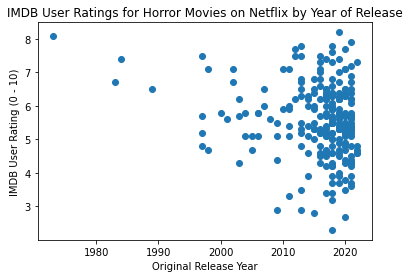

According to IMDB user ratings, the highest rated movie in the horror genre is The Blue Elephant 2.
According to IMDB user ratings, the lowest rated movie in the horror genre is Romina.
The average IMDB user rating for horror movies on Netflix is 5.579838709677415.


In [32]:
x_values = quality_horrorDF["release_year"]
y_values = quality_horrorDF["imdb_score"]

plt.scatter(x_values, y_values)
plt.title("IMDB User Ratings for Horror Movies on Netflix by Year of Release")
plt.xlabel("Original Release Year")
plt.ylabel("IMDB User Rating (0 - 10)")
plt.show()

print(f"According to IMDB user ratings, the highest rated movie in the horror genre is {highestRated}.")
print(f"According to IMDB user ratings, the lowest rated movie in the horror genre is {lowestRated}.")
print(f"The average IMDB user rating for horror movies on Netflix is {horror_average}.")

In [67]:
netflix_complete_horror = netflix_complete_movies.loc[netflix_complete_movies['genres'].str.contains('horror')==True]
actorsHorrorDF = netflix_complete_horror.loc[netflix_complete_horror['role'].str.contains('ACTOR')==True]
actorsHorror = actorsHorrorDF["name"]
topActors = actorsHorror.value_counts()

In [71]:
top10 = topActors[0:10]
top10

Yuki Kaji           5
Javier Botet        5
Patrick Wilson      4
Ashley Zukerman     4
Nathan Cooper       4
Rikiya Koyama       4
Kevin Waterman      4
Kate Siegel         4
Tony Todd           4
Takahiro Sakurai    4
Name: name, dtype: int64

Text(0, 0.5, 'Number of Movies')

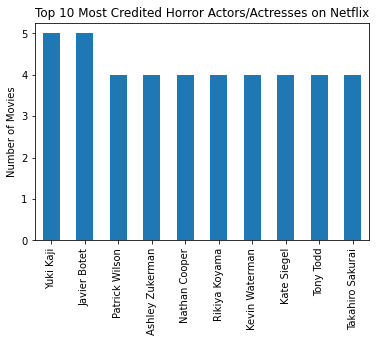

In [74]:
top10.plot(kind = "bar")
plt.title("Top 10 Most Credited Horror Actors/Actresses on Netflix")
plt.ylabel("Number of Movies")